In [1]:
import pandas as pd
from collections import defaultdict
import warnings
import visualize
import neat
import multiprocessing
import os
import matplotlib.pyplot as plt

import numpy as np

from sklearn.datasets import load_digits
digits = load_digits()

In [2]:
X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[:1617]
y = digits.target[:1617]

In [3]:
def softmax(x, axis=1):
    # 计算每行的最大值
    row_max = x.max(axis=axis)
 
    # 每行元素都需要减去对应的最大值，否则求exp(x)会溢出，导致inf情况
    row_max=row_max.reshape(-1, 1)
    x = x - row_max
 
    # 计算e的指数次幂
    x_exp = np.exp(x)
    x_sum = np.sum(x_exp, axis=axis, keepdims=True)
    s = x_exp / x_sum
    return s

In [4]:
def get_winner(class1):
    
    numbers = [*range(10)] # number 2 > number 1
    number_of_classification = len(numbers)
    #number_of_sampling = 100

    list_y = y.tolist()
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

        
    class2 = []

    class1_indexes = []
    class2_indexes = []

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)

    print("number of class1:{}".format(len(class1_label)))
    print("number of class2:{}".format(len(class2_label)))

    samplesize = 1617
    x_inputs =[tuple(c) for c in X[class1_indexes].tolist()] + [tuple(c) for c in X[class2_indexes].tolist()]
    x_outputs = [tuple([c]) for c in class1_label + class2_label]
    
    
    def eval_genomes(genomes, config):
        for genome_id, genome in genomes:
            net = neat.nn.FeedForwardNetwork.create(genome, config)

            outputs = []
            for xi in x_inputs:
                output = net.activate(xi)
                outputs.append(output)


            px_outputs = softmax(np.array(outputs).reshape(samplesize, 2), axis=1)
            # the index of maximum in each line
            pred_outputs = np.argmax(px_outputs, axis = 1)
            real_outputs = np.array(x_outputs).reshape(samplesize,)

            acc = np.sum(pred_outputs == real_outputs)/samplesize

            genome.fitness = acc

    def run(config_file):
        # Load configuration.
        config = neat.Config(
            neat.DefaultGenome,
            neat.DefaultReproduction,
            neat.DefaultSpeciesSet,
            neat.DefaultStagnation,
            config_file,
        )

        # Create the population, which is the top-level object for a NEAT run.
        p = neat.Population(config)

        # add a stdout reporter to show progress in the terminal
        reporter = neat.StdOutReporter(False)
        p.add_reporter(reporter)
        stats = neat.StatisticsReporter()
        p.add_reporter(stats)
        #checkpointer = neat.Checkpointer(100)
        #p.add_reporter(checkpointer)
        # Run for up to 300 generations.
        winner = p.run(eval_genomes, 150)

        return [stats, winner]
    
    local_dir = os.getcwd()
    config_path = os.path.join(local_dir, "config-feedforward-mnist2")
    [stats, winner] = run(config_path)
    
    return winner

In [5]:
import numpy as np
import random

number_codes = []
for i in range(2**(10-1), 2**10-1):
    for j in bin(i).split('b')[1]:
        number_codes.append(int(j))
number_codes = np.array(number_codes).reshape(2**9 - 1,10).T     

slice = random.sample(range(511),10)

number_codes = number_codes[:,slice].tolist() 

In [6]:
classes = []
for i in range(10):
    code_list = np.array(number_codes).T[i]
    classes.append(np.where(code_list==1)[0].tolist())

In [19]:
matrix_errors = []

for i in range(9):
    for j in range(i+1,10):
        matrix_errors.append(10 - np.sum(np.array(number_codes[i]) == np.array(number_codes[j])))
np.min(matrix_errors)
        # print(number_codes[i], number_codes[j], 3 - np.sum(np.array(number_codes[i]) == np.array(number_codes[j])))
#np.mean(matrix_errors)  

2

In [8]:
winner_list = []

for class1 in classes:
    winner = get_winner(class1)
    winner_list.append(winner)

number of class1:652
number of class2:965

 ****** Running generation 0 ****** 

Population's average fitness: 0.51113 stdev: 0.09083
Best fitness: 0.78479 - size: (2, 13) - species 2 - id 46
Average adjusted fitness: 0.261
Mean genetic distance 2.847, standard deviation 0.458
Population of 199 members in 23 species
Total extinctions: 0
Generation time: 11.495 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57131 stdev: 0.09330
Best fitness: 0.80643 - size: (3, 15) - species 16 - id 301
Average adjusted fitness: 0.228
Mean genetic distance 2.953, standard deviation 0.478
Population of 203 members in 27 species
Total extinctions: 0
Generation time: 13.165 sec (12.330 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59042 stdev: 0.09541
Best fitness: 0.80643 - size: (3, 15) - species 16 - id 301
Average adjusted fitness: 0.252
Mean genetic distance 2.988, standard deviation 0.486
Population of 201 members in 28 species
Total extin

Population's average fitness: 0.66654 stdev: 0.11752
Best fitness: 0.84663 - size: (7, 23) - species 36 - id 3076
Average adjusted fitness: 0.391
Mean genetic distance 3.092, standard deviation 0.512
Population of 201 members in 25 species
Total extinctions: 0
Generation time: 13.962 sec (13.338 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.66445 stdev: 0.11285
Best fitness: 0.84663 - size: (7, 23) - species 28 - id 3076
Average adjusted fitness: 0.288
Mean genetic distance 3.112, standard deviation 0.500
Population of 203 members in 27 species
Total extinctions: 0
Generation time: 14.372 sec (13.501 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.66661 stdev: 0.10610
Best fitness: 0.84663 - size: (7, 23) - species 28 - id 3076
Average adjusted fitness: 0.262
Mean genetic distance 3.138, standard deviation 0.509
Population of 194 members in 27 species
Total extinctions: 0
Generation time: 14.480 sec (13.665 average)

 

Population's average fitness: 0.67719 stdev: 0.11335
Best fitness: 0.85343 - size: (11, 31) - species 36 - id 5752
Average adjusted fitness: 0.370
Mean genetic distance 3.257, standard deviation 0.580
Population of 198 members in 18 species
Total extinctions: 0
Generation time: 17.503 sec (16.195 average)

 ****** Running generation 49 ****** 

Population's average fitness: 0.69750 stdev: 0.10559
Best fitness: 0.85343 - size: (11, 31) - species 36 - id 5752
Average adjusted fitness: 0.289
Mean genetic distance 3.255, standard deviation 0.571
Population of 201 members in 18 species
Total extinctions: 0
Generation time: 17.390 sec (16.293 average)

 ****** Running generation 50 ****** 

Population's average fitness: 0.67786 stdev: 0.12201
Best fitness: 0.85343 - size: (11, 31) - species 36 - id 5752
Average adjusted fitness: 0.454
Mean genetic distance 3.289, standard deviation 0.562
Population of 197 members in 18 species
Total extinctions: 0
Generation time: 17.438 sec (16.500 average)

Population's average fitness: 0.69789 stdev: 0.10699
Best fitness: 0.85962 - size: (9, 27) - species 28 - id 11083
Average adjusted fitness: 0.294
Mean genetic distance 3.310, standard deviation 0.598
Population of 197 members in 15 species
Total extinctions: 0
Generation time: 19.417 sec (18.774 average)

 ****** Running generation 73 ****** 

Population's average fitness: 0.69108 stdev: 0.11156
Best fitness: 0.85962 - size: (9, 27) - species 28 - id 11083
Average adjusted fitness: 0.303
Mean genetic distance 3.303, standard deviation 0.593
Population of 200 members in 15 species
Total extinctions: 0
Generation time: 20.213 sec (18.996 average)

 ****** Running generation 74 ****** 

Population's average fitness: 0.68288 stdev: 0.11856
Best fitness: 0.85962 - size: (9, 27) - species 28 - id 11083
Average adjusted fitness: 0.280
Mean genetic distance 3.289, standard deviation 0.614
Population of 195 members in 14 species
Total extinctions: 0
Generation time: 19.526 sec (19.138 average)

Population's average fitness: 0.67109 stdev: 0.13501
Best fitness: 0.85962 - size: (9, 27) - species 28 - id 11083
Average adjusted fitness: 0.305
Mean genetic distance 3.175, standard deviation 0.615
Population of 199 members in 13 species
Total extinctions: 0
Generation time: 19.942 sec (19.522 average)

 ****** Running generation 97 ****** 

Population's average fitness: 0.66981 stdev: 0.12412
Best fitness: 0.85962 - size: (9, 27) - species 28 - id 11083
Average adjusted fitness: 0.374
Mean genetic distance 3.210, standard deviation 0.604
Population of 202 members in 15 species
Total extinctions: 0
Generation time: 19.844 sec (19.485 average)

 ****** Running generation 98 ****** 

Population's average fitness: 0.65111 stdev: 0.13022
Best fitness: 0.85962 - size: (9, 27) - species 28 - id 11083
Average adjusted fitness: 0.367
Mean genetic distance 3.220, standard deviation 0.601
Population of 200 members in 16 species
Total extinctions: 0
Generation time: 19.375 sec (19.322 average)

Population's average fitness: 0.69482 stdev: 0.12443
Best fitness: 0.85962 - size: (9, 27) - species 28 - id 11083
Average adjusted fitness: 0.329
Mean genetic distance 3.160, standard deviation 0.619
Population of 201 members in 14 species
Total extinctions: 0
Generation time: 19.840 sec (19.863 average)

 ****** Running generation 121 ****** 

Population's average fitness: 0.69305 stdev: 0.12627
Best fitness: 0.85962 - size: (9, 27) - species 28 - id 11083
Average adjusted fitness: 0.403
Mean genetic distance 3.152, standard deviation 0.614
Population of 197 members in 14 species
Total extinctions: 0
Generation time: 20.122 sec (19.965 average)

 ****** Running generation 122 ****** 

Population's average fitness: 0.70221 stdev: 0.12120
Best fitness: 0.85962 - size: (9, 27) - species 28 - id 11083
Average adjusted fitness: 0.332
Mean genetic distance 3.173, standard deviation 0.606
Population of 200 members in 14 species
Total extinctions: 0
Generation time: 19.311 sec (19.941 averag

Population's average fitness: 0.71292 stdev: 0.12210
Best fitness: 0.85962 - size: (9, 27) - species 28 - id 11083
Average adjusted fitness: 0.457
Mean genetic distance 3.130, standard deviation 0.630
Population of 203 members in 16 species
Total extinctions: 0
Generation time: 19.649 sec (19.457 average)

 ****** Running generation 145 ****** 

Population's average fitness: 0.70257 stdev: 0.12143
Best fitness: 0.85962 - size: (9, 27) - species 28 - id 11083
Average adjusted fitness: 0.307
Mean genetic distance 3.133, standard deviation 0.632
Population of 198 members in 16 species
Total extinctions: 0
Generation time: 19.713 sec (19.500 average)

 ****** Running generation 146 ****** 

Population's average fitness: 0.71956 stdev: 0.11107
Best fitness: 0.85962 - size: (9, 27) - species 28 - id 11083
Average adjusted fitness: 0.343
Mean genetic distance 3.138, standard deviation 0.623
Population of 196 members in 15 species
Total extinctions: 0
Generation time: 19.967 sec (19.579 averag

Population's average fitness: 0.64429 stdev: 0.08701
Best fitness: 0.80025 - size: (6, 17) - species 9 - id 1435
Average adjusted fitness: 0.294
Mean genetic distance 3.186, standard deviation 0.511
Population of 196 members in 37 species
Total extinctions: 0
Generation time: 13.373 sec (12.989 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.65207 stdev: 0.09320
Best fitness: 0.80025 - size: (6, 17) - species 9 - id 1435
Average adjusted fitness: 0.282
Mean genetic distance 3.151, standard deviation 0.500
Population of 196 members in 35 species
Total extinctions: 0
Generation time: 13.179 sec (13.053 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.65783 stdev: 0.08373
Best fitness: 0.82066 - size: (5, 19) - species 23 - id 2768
Average adjusted fitness: 0.260
Mean genetic distance 3.158, standard deviation 0.491
Population of 204 members in 38 species
Total extinctions: 0
Generation time: 12.901 sec (13.024 average)

 **

Population's average fitness: 0.65451 stdev: 0.10476
Best fitness: 0.82251 - size: (5, 20) - species 48 - id 4721
Average adjusted fitness: 0.289
Mean genetic distance 3.194, standard deviation 0.540
Population of 197 members in 21 species
Total extinctions: 0
Generation time: 14.325 sec (13.979 average)

 ****** Running generation 43 ****** 

Population's average fitness: 0.64970 stdev: 0.10521
Best fitness: 0.82251 - size: (5, 20) - species 48 - id 4721
Average adjusted fitness: 0.324
Mean genetic distance 3.196, standard deviation 0.531
Population of 198 members in 21 species
Total extinctions: 0
Generation time: 15.332 sec (14.171 average)

 ****** Running generation 44 ****** 

Population's average fitness: 0.64953 stdev: 0.10190
Best fitness: 0.82251 - size: (5, 20) - species 48 - id 4721
Average adjusted fitness: 0.261
Mean genetic distance 3.195, standard deviation 0.535
Population of 198 members in 21 species
Total extinctions: 0
Generation time: 14.642 sec (14.280 average)

 

Population's average fitness: 0.66247 stdev: 0.10128
Best fitness: 0.84848 - size: (6, 21) - species 48 - id 8147
Average adjusted fitness: 0.270
Mean genetic distance 3.247, standard deviation 0.606
Population of 203 members in 17 species
Total extinctions: 0
Generation time: 16.724 sec (16.800 average)

 ****** Running generation 67 ****** 

Population's average fitness: 0.65922 stdev: 0.09987
Best fitness: 0.84848 - size: (6, 21) - species 48 - id 8147
Average adjusted fitness: 0.271
Mean genetic distance 3.237, standard deviation 0.599
Population of 203 members in 15 species
Total extinctions: 0
Generation time: 17.407 sec (16.914 average)

 ****** Running generation 68 ****** 

Population's average fitness: 0.67096 stdev: 0.10349
Best fitness: 0.84848 - size: (6, 21) - species 48 - id 8147
Average adjusted fitness: 0.268
Mean genetic distance 3.207, standard deviation 0.589
Population of 194 members in 14 species
Total extinctions: 0
Generation time: 17.744 sec (17.052 average)

 

Population's average fitness: 0.68503 stdev: 0.10586
Best fitness: 0.86024 - size: (8, 22) - species 62 - id 13270
Average adjusted fitness: 0.290
Mean genetic distance 3.064, standard deviation 0.593
Population of 199 members in 15 species
Total extinctions: 0
Generation time: 18.211 sec (18.243 average)

 ****** Running generation 91 ****** 

Population's average fitness: 0.67688 stdev: 0.10304
Best fitness: 0.86024 - size: (8, 22) - species 62 - id 13270
Average adjusted fitness: 0.276
Mean genetic distance 3.104, standard deviation 0.600
Population of 205 members in 15 species
Total extinctions: 0
Generation time: 18.872 sec (18.299 average)

 ****** Running generation 92 ****** 

Population's average fitness: 0.68131 stdev: 0.09811
Best fitness: 0.86024 - size: (8, 22) - species 62 - id 13270
Average adjusted fitness: 0.321
Mean genetic distance 3.095, standard deviation 0.606
Population of 204 members in 15 species
Total extinctions: 0
Generation time: 19.729 sec (18.409 average)

Population's average fitness: 0.67063 stdev: 0.11682
Best fitness: 0.86024 - size: (8, 22) - species 80 - id 13270
Average adjusted fitness: 0.334
Mean genetic distance 2.945, standard deviation 0.510
Population of 203 members in 14 species
Total extinctions: 0
Generation time: 20.264 sec (19.257 average)

 ****** Running generation 115 ****** 

Population's average fitness: 0.68633 stdev: 0.11006
Best fitness: 0.86024 - size: (8, 22) - species 80 - id 13270
Average adjusted fitness: 0.370
Mean genetic distance 2.946, standard deviation 0.503
Population of 203 members in 14 species
Total extinctions: 0
Generation time: 19.861 sec (19.402 average)

 ****** Running generation 116 ****** 

Population's average fitness: 0.68131 stdev: 0.11226
Best fitness: 0.86024 - size: (8, 22) - species 80 - id 13270
Average adjusted fitness: 0.358
Mean genetic distance 2.969, standard deviation 0.497
Population of 199 members in 15 species
Total extinctions: 0
Generation time: 20.314 sec (19.548 averag

Population's average fitness: 0.69311 stdev: 0.10516
Best fitness: 0.86333 - size: (9, 25) - species 80 - id 19293
Average adjusted fitness: 0.295
Mean genetic distance 3.048, standard deviation 0.520
Population of 198 members in 16 species
Total extinctions: 0
Generation time: 19.469 sec (19.475 average)

 ****** Running generation 139 ****** 

Population's average fitness: 0.69691 stdev: 0.11106
Best fitness: 0.86333 - size: (9, 25) - species 80 - id 19293
Average adjusted fitness: 0.316
Mean genetic distance 3.057, standard deviation 0.530
Population of 201 members in 16 species
Total extinctions: 0
Generation time: 19.747 sec (19.504 average)

 ****** Running generation 140 ****** 

Population's average fitness: 0.70307 stdev: 0.09702
Best fitness: 0.86333 - size: (9, 25) - species 80 - id 19293
Average adjusted fitness: 0.307
Mean genetic distance 3.050, standard deviation 0.528
Population of 199 members in 16 species
Total extinctions: 0
Generation time: 19.300 sec (19.422 averag

Population's average fitness: 0.59944 stdev: 0.08065
Best fitness: 0.76933 - size: (3, 14) - species 4 - id 662
Average adjusted fitness: 0.188
Mean genetic distance 3.151, standard deviation 0.487
Population of 202 members in 38 species
Total extinctions: 0
Generation time: 13.744 sec (12.325 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.60598 stdev: 0.08386
Best fitness: 0.76933 - size: (3, 14) - species 4 - id 662
Average adjusted fitness: 0.234
Mean genetic distance 3.152, standard deviation 0.486
Population of 202 members in 39 species
Total extinctions: 0
Generation time: 13.215 sec (12.485 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.60908 stdev: 0.08319
Best fitness: 0.77365 - size: (9, 25) - species 13 - id 2143
Average adjusted fitness: 0.244
Mean genetic distance 3.171, standard deviation 0.488
Population of 199 members in 39 species
Total extinctions: 0
Generation time: 13.447 sec (12.679 average)

 ****

Population's average fitness: 0.62912 stdev: 0.08896
Best fitness: 0.78602 - size: (8, 27) - species 44 - id 4159
Average adjusted fitness: 0.287
Mean genetic distance 3.278, standard deviation 0.526
Population of 193 members in 24 species
Total extinctions: 0
Generation time: 15.001 sec (14.800 average)

 ****** Running generation 37 ****** 

Population's average fitness: 0.63545 stdev: 0.08746
Best fitness: 0.78602 - size: (8, 27) - species 44 - id 4159
Average adjusted fitness: 0.164
Mean genetic distance 3.286, standard deviation 0.529
Population of 193 members in 24 species
Total extinctions: 0
Generation time: 14.783 sec (14.831 average)

 ****** Running generation 38 ****** 

Population's average fitness: 0.64311 stdev: 0.08676
Best fitness: 0.78602 - size: (8, 27) - species 44 - id 4159
Average adjusted fitness: 0.149
Mean genetic distance 3.272, standard deviation 0.542
Population of 197 members in 23 species
Total extinctions: 0
Generation time: 14.855 sec (14.914 average)

 

Population's average fitness: 0.63278 stdev: 0.09375
Best fitness: 0.79097 - size: (9, 28) - species 44 - id 6661
Average adjusted fitness: 0.204
Mean genetic distance 3.254, standard deviation 0.551
Population of 205 members in 19 species
Total extinctions: 0
Generation time: 16.710 sec (16.686 average)

 ****** Running generation 61 ****** 

Population's average fitness: 0.61597 stdev: 0.09891
Best fitness: 0.79097 - size: (13, 40) - species 26 - id 9004
Average adjusted fitness: 0.273
Mean genetic distance 3.249, standard deviation 0.584
Population of 194 members in 18 species
Total extinctions: 0
Generation time: 17.324 sec (16.800 average)

 ****** Running generation 62 ****** 

Population's average fitness: 0.62734 stdev: 0.09361
Best fitness: 0.79097 - size: (13, 40) - species 26 - id 9004
Average adjusted fitness: 0.216
Mean genetic distance 3.235, standard deviation 0.579
Population of 201 members in 17 species
Total extinctions: 0
Generation time: 16.220 sec (16.691 average)


Population's average fitness: 0.64323 stdev: 0.09114
Best fitness: 0.80519 - size: (5, 19) - species 52 - id 9844
Average adjusted fitness: 0.165
Mean genetic distance 3.113, standard deviation 0.584
Population of 203 members in 17 species
Total extinctions: 0
Generation time: 18.440 sec (18.155 average)

 ****** Running generation 85 ****** 

Population's average fitness: 0.63761 stdev: 0.09512
Best fitness: 0.80519 - size: (5, 19) - species 52 - id 9844
Average adjusted fitness: 0.270
Mean genetic distance 3.131, standard deviation 0.569
Population of 202 members in 18 species
Total extinctions: 0
Generation time: 19.033 sec (18.271 average)

 ****** Running generation 86 ****** 

Population's average fitness: 0.63787 stdev: 0.09698
Best fitness: 0.80519 - size: (5, 19) - species 52 - id 9844
Average adjusted fitness: 0.265
Mean genetic distance 3.125, standard deviation 0.564
Population of 205 members in 19 species
Total extinctions: 0
Generation time: 19.288 sec (18.362 average)

 

Population's average fitness: 0.64438 stdev: 0.10165
Best fitness: 0.81756 - size: (7, 23) - species 73 - id 15941
Average adjusted fitness: 0.239
Mean genetic distance 3.030, standard deviation 0.628
Population of 199 members in 12 species
Total extinctions: 0
Generation time: 19.776 sec (19.503 average)

 ****** Running generation 109 ****** 

Population's average fitness: 0.63068 stdev: 0.09578
Best fitness: 0.81756 - size: (7, 23) - species 73 - id 15941
Average adjusted fitness: 0.220
Mean genetic distance 3.026, standard deviation 0.614
Population of 201 members in 12 species
Total extinctions: 0
Generation time: 20.621 sec (19.667 average)

 ****** Running generation 110 ****** 

Population's average fitness: 0.63646 stdev: 0.09669
Best fitness: 0.81756 - size: (7, 23) - species 73 - id 15941
Average adjusted fitness: 0.174
Mean genetic distance 3.037, standard deviation 0.608
Population of 203 members in 12 species
Total extinctions: 0
Generation time: 19.636 sec (19.734 averag

Population's average fitness: 0.63696 stdev: 0.10694
Best fitness: 0.81756 - size: (7, 23) - species 73 - id 15941
Average adjusted fitness: 0.267
Mean genetic distance 2.922, standard deviation 0.547
Population of 203 members in 12 species
Total extinctions: 0
Generation time: 23.495 sec (22.088 average)

 ****** Running generation 133 ****** 

Population's average fitness: 0.65003 stdev: 0.10134
Best fitness: 0.81756 - size: (7, 23) - species 73 - id 15941
Average adjusted fitness: 0.174
Mean genetic distance 2.918, standard deviation 0.539
Population of 204 members in 12 species
Total extinctions: 0
Generation time: 23.853 sec (22.416 average)

 ****** Running generation 134 ****** 

Population's average fitness: 0.64585 stdev: 0.09934
Best fitness: 0.81756 - size: (7, 23) - species 73 - id 15941
Average adjusted fitness: 0.285
Mean genetic distance 2.911, standard deviation 0.542
Population of 201 members in 12 species
Total extinctions: 0
Generation time: 24.286 sec (22.820 averag

Population's average fitness: 0.64302 stdev: 0.11764
Best fitness: 0.79097 - size: (5, 15) - species 25 - id 1022
Average adjusted fitness: 0.401
Mean genetic distance 3.147, standard deviation 0.534
Population of 207 members in 31 species
Total extinctions: 0
Generation time: 12.144 sec (11.162 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.64112 stdev: 0.11980
Best fitness: 0.79097 - size: (5, 15) - species 25 - id 1022
Average adjusted fitness: 0.369
Mean genetic distance 3.137, standard deviation 0.527
Population of 202 members in 33 species
Total extinctions: 0
Generation time: 12.783 sec (11.365 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.64983 stdev: 0.11542
Best fitness: 0.79097 - size: (5, 15) - species 25 - id 1022
Average adjusted fitness: 0.349
Mean genetic distance 3.143, standard deviation 0.540
Population of 200 members in 34 species
Total extinctions: 0
Generation time: 12.443 sec (11.485 average)

 **

Population's average fitness: 0.66830 stdev: 0.13653
Best fitness: 0.81818 - size: (9, 22) - species 12 - id 3767
Average adjusted fitness: 0.409
Mean genetic distance 3.295, standard deviation 0.525
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 13.296 sec (13.205 average)

 ****** Running generation 31 ****** 

Population's average fitness: 0.66558 stdev: 0.13594
Best fitness: 0.81818 - size: (9, 22) - species 12 - id 3767
Average adjusted fitness: 0.373
Mean genetic distance 3.305, standard deviation 0.534
Population of 191 members in 28 species
Total extinctions: 0
Generation time: 13.711 sec (13.265 average)

 ****** Running generation 32 ****** 

Population's average fitness: 0.66388 stdev: 0.13529
Best fitness: 0.81818 - size: (9, 22) - species 12 - id 3767
Average adjusted fitness: 0.365
Mean genetic distance 3.277, standard deviation 0.530
Population of 191 members in 26 species
Total extinctions: 0
Generation time: 13.083 sec (13.286 average)

 

Population's average fitness: 0.65959 stdev: 0.14137
Best fitness: 0.82560 - size: (8, 23) - species 3 - id 6942
Average adjusted fitness: 0.355
Mean genetic distance 3.254, standard deviation 0.564
Population of 195 members in 20 species
Total extinctions: 0
Generation time: 15.346 sec (14.811 average)

 ****** Running generation 55 ****** 

Population's average fitness: 0.64898 stdev: 0.15202
Best fitness: 0.82560 - size: (8, 23) - species 3 - id 6942
Average adjusted fitness: 0.368
Mean genetic distance 3.282, standard deviation 0.563
Population of 198 members in 20 species
Total extinctions: 0
Generation time: 14.492 sec (14.828 average)

 ****** Running generation 56 ****** 

Population's average fitness: 0.66170 stdev: 0.14571
Best fitness: 0.83735 - size: (9, 24) - species 54 - id 8141
Average adjusted fitness: 0.375
Mean genetic distance 3.304, standard deviation 0.560
Population of 200 members in 19 species
Total extinctions: 0
Generation time: 15.490 sec (14.935 average)

 **

Population's average fitness: 0.65110 stdev: 0.16940
Best fitness: 0.85220 - size: (8, 26) - species 3 - id 9056
Average adjusted fitness: 0.359
Mean genetic distance 3.229, standard deviation 0.578
Population of 199 members in 19 species
Total extinctions: 0
Generation time: 15.682 sec (15.582 average)

 ****** Running generation 79 ****** 

Population's average fitness: 0.68598 stdev: 0.14381
Best fitness: 0.85220 - size: (8, 26) - species 3 - id 9056
Average adjusted fitness: 0.409
Mean genetic distance 3.234, standard deviation 0.571
Population of 202 members in 19 species
Total extinctions: 0
Generation time: 15.596 sec (15.589 average)

 ****** Running generation 80 ****** 

Population's average fitness: 0.67088 stdev: 0.15766
Best fitness: 0.85220 - size: (8, 26) - species 3 - id 9056
Average adjusted fitness: 0.370
Mean genetic distance 3.224, standard deviation 0.585
Population of 197 members in 18 species
Total extinctions: 0
Generation time: 15.432 sec (15.598 average)

 ***

Population's average fitness: 0.64059 stdev: 0.15327
Best fitness: 0.88497 - size: (12, 32) - species 64 - id 12730
Average adjusted fitness: 0.347
Mean genetic distance 3.180, standard deviation 0.609
Population of 202 members in 15 species
Total extinctions: 0
Generation time: 20.339 sec (18.762 average)

 ****** Running generation 103 ****** 

Population's average fitness: 0.65431 stdev: 0.14252
Best fitness: 0.88497 - size: (12, 32) - species 64 - id 12730
Average adjusted fitness: 0.344
Mean genetic distance 3.189, standard deviation 0.595
Population of 198 members in 15 species
Total extinctions: 0
Generation time: 20.405 sec (19.133 average)

 ****** Running generation 104 ****** 

Population's average fitness: 0.66141 stdev: 0.13654
Best fitness: 0.88497 - size: (12, 32) - species 64 - id 12730
Average adjusted fitness: 0.360
Mean genetic distance 3.175, standard deviation 0.608
Population of 199 members in 15 species
Total extinctions: 0
Generation time: 20.165 sec (19.323 ave

Population's average fitness: 0.65822 stdev: 0.15005
Best fitness: 0.88497 - size: (12, 32) - species 64 - id 12730
Average adjusted fitness: 0.438
Mean genetic distance 3.150, standard deviation 0.545
Population of 198 members in 13 species
Total extinctions: 0
Generation time: 22.374 sec (21.962 average)

 ****** Running generation 127 ****** 

Population's average fitness: 0.67320 stdev: 0.12904
Best fitness: 0.88497 - size: (12, 32) - species 64 - id 12730
Average adjusted fitness: 0.375
Mean genetic distance 3.138, standard deviation 0.572
Population of 204 members in 12 species
Total extinctions: 0
Generation time: 21.649 sec (21.981 average)

 ****** Running generation 128 ****** 

Population's average fitness: 0.67657 stdev: 0.13614
Best fitness: 0.88497 - size: (12, 32) - species 64 - id 12730
Average adjusted fitness: 0.375
Mean genetic distance 3.114, standard deviation 0.593
Population of 203 members in 12 species
Total extinctions: 0
Generation time: 22.133 sec (22.029 ave

Population's average fitness: 0.52605 stdev: 0.14867
Best fitness: 0.78541 - size: (2, 13) - species 1 - id 55
Average adjusted fitness: 0.280
Mean genetic distance 2.864, standard deviation 0.448
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 8.354 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.60562 stdev: 0.13254
Best fitness: 0.78541 - size: (2, 13) - species 1 - id 55
Average adjusted fitness: 0.355
Mean genetic distance 2.930, standard deviation 0.476
Population of 201 members in 25 species
Total extinctions: 0
Generation time: 8.852 sec (8.603 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.63631 stdev: 0.11940
Best fitness: 0.82560 - size: (3, 16) - species 1 - id 546
Average adjusted fitness: 0.347
Mean genetic distance 2.983, standard deviation 0.492
Population of 203 members in 27 species
Total extinctions: 0
Generation time: 9.072 sec (8.759 average)

 ****** Running generation 3 ****

Population's average fitness: 0.69350 stdev: 0.11907
Best fitness: 0.83921 - size: (3, 18) - species 1 - id 2628
Average adjusted fitness: 0.378
Mean genetic distance 3.237, standard deviation 0.511
Population of 206 members in 34 species
Total extinctions: 0
Generation time: 11.455 sec (11.017 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.69763 stdev: 0.11784
Best fitness: 0.84045 - size: (5, 22) - species 25 - id 3494
Average adjusted fitness: 0.415
Mean genetic distance 3.234, standard deviation 0.499
Population of 200 members in 35 species
Total extinctions: 0
Generation time: 12.164 sec (11.168 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.70515 stdev: 0.11417
Best fitness: 0.84045 - size: (5, 22) - species 25 - id 3494
Average adjusted fitness: 0.401
Mean genetic distance 3.243, standard deviation 0.483
Population of 197 members in 34 species
Total extinctions: 0
Generation time: 11.799 sec (11.272 average)

 *

Population's average fitness: 0.70735 stdev: 0.12006
Best fitness: 0.87446 - size: (6, 23) - species 45 - id 5721
Average adjusted fitness: 0.403
Mean genetic distance 3.274, standard deviation 0.567
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 11.795 sec (11.979 average)

 ****** Running generation 49 ****** 

Population's average fitness: 0.72773 stdev: 0.09735
Best fitness: 0.87446 - size: (6, 23) - species 45 - id 5721
Average adjusted fitness: 0.419
Mean genetic distance 3.272, standard deviation 0.566
Population of 197 members in 24 species
Total extinctions: 0
Generation time: 12.476 sec (12.031 average)

 ****** Running generation 50 ****** 

Population's average fitness: 0.69548 stdev: 0.13060
Best fitness: 0.87446 - size: (6, 23) - species 45 - id 5721
Average adjusted fitness: 0.394
Mean genetic distance 3.236, standard deviation 0.556
Population of 198 members in 25 species
Total extinctions: 0
Generation time: 12.161 sec (12.039 average)

 

Population's average fitness: 0.71447 stdev: 0.13417
Best fitness: 0.88002 - size: (7, 26) - species 59 - id 9588
Average adjusted fitness: 0.410
Mean genetic distance 3.138, standard deviation 0.553
Population of 196 members in 18 species
Total extinctions: 0
Generation time: 12.285 sec (12.789 average)

 ****** Running generation 73 ****** 

Population's average fitness: 0.72241 stdev: 0.12524
Best fitness: 0.88002 - size: (7, 26) - species 59 - id 9588
Average adjusted fitness: 0.421
Mean genetic distance 3.144, standard deviation 0.560
Population of 199 members in 18 species
Total extinctions: 0
Generation time: 12.538 sec (12.709 average)

 ****** Running generation 74 ****** 

Population's average fitness: 0.72766 stdev: 0.11264
Best fitness: 0.88002 - size: (7, 26) - species 59 - id 9588
Average adjusted fitness: 0.419
Mean genetic distance 3.135, standard deviation 0.566
Population of 204 members in 18 species
Total extinctions: 0
Generation time: 12.755 sec (12.716 average)

 

Population's average fitness: 0.72117 stdev: 0.13070
Best fitness: 0.88312 - size: (7, 27) - species 45 - id 14242
Average adjusted fitness: 0.407
Mean genetic distance 3.105, standard deviation 0.564
Population of 198 members in 16 species
Total extinctions: 0
Generation time: 13.387 sec (12.914 average)

 ****** Running generation 97 ****** 

Population's average fitness: 0.70368 stdev: 0.13823
Best fitness: 0.88312 - size: (7, 27) - species 45 - id 14242
Average adjusted fitness: 0.398
Mean genetic distance 3.097, standard deviation 0.564
Population of 202 members in 16 species
Total extinctions: 0
Generation time: 13.474 sec (12.993 average)

 ****** Running generation 98 ****** 

Population's average fitness: 0.73889 stdev: 0.11092
Best fitness: 0.88312 - size: (7, 27) - species 45 - id 14242
Average adjusted fitness: 0.493
Mean genetic distance 3.092, standard deviation 0.565
Population of 203 members in 16 species
Total extinctions: 0
Generation time: 13.960 sec (13.106 average)

Population's average fitness: 0.74024 stdev: 0.12330
Best fitness: 0.90724 - size: (14, 38) - species 74 - id 18276
Average adjusted fitness: 0.440
Mean genetic distance 3.059, standard deviation 0.536
Population of 197 members in 17 species
Total extinctions: 0
Generation time: 14.170 sec (14.192 average)

 ****** Running generation 121 ****** 

Population's average fitness: 0.72758 stdev: 0.13883
Best fitness: 0.90847 - size: (15, 39) - species 74 - id 18616
Average adjusted fitness: 0.431
Mean genetic distance 3.054, standard deviation 0.533
Population of 197 members in 18 species
Total extinctions: 0
Generation time: 13.974 sec (14.148 average)

 ****** Running generation 122 ****** 

Population's average fitness: 0.74807 stdev: 0.11156
Best fitness: 0.90847 - size: (15, 39) - species 74 - id 18616
Average adjusted fitness: 0.447
Mean genetic distance 3.056, standard deviation 0.550
Population of 195 members in 18 species
Total extinctions: 0
Generation time: 13.878 sec (14.109 ave

Population's average fitness: 0.73365 stdev: 0.11116
Best fitness: 0.91899 - size: (16, 41) - species 74 - id 22145
Average adjusted fitness: 0.428
Mean genetic distance 2.926, standard deviation 0.520
Population of 202 members in 13 species
Total extinctions: 0
Generation time: 15.321 sec (15.365 average)

 ****** Running generation 145 ****** 

Population's average fitness: 0.72168 stdev: 0.13726
Best fitness: 0.91899 - size: (16, 41) - species 74 - id 22145
Average adjusted fitness: 0.399
Mean genetic distance 2.943, standard deviation 0.513
Population of 202 members in 14 species
Total extinctions: 0
Generation time: 16.319 sec (15.523 average)

 ****** Running generation 146 ****** 

Population's average fitness: 0.72115 stdev: 0.13516
Best fitness: 0.91899 - size: (16, 41) - species 74 - id 22145
Average adjusted fitness: 0.423
Mean genetic distance 2.986, standard deviation 0.557
Population of 203 members in 13 species
Total extinctions: 0
Generation time: 16.017 sec (15.530 ave

Population's average fitness: 0.67347 stdev: 0.12305
Best fitness: 0.83055 - size: (7, 23) - species 19 - id 2018
Average adjusted fitness: 0.388
Mean genetic distance 3.161, standard deviation 0.481
Population of 201 members in 36 species
Total extinctions: 0
Generation time: 11.175 sec (10.731 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.68556 stdev: 0.10386
Best fitness: 0.84663 - size: (8, 26) - species 19 - id 2474
Average adjusted fitness: 0.300
Mean genetic distance 3.190, standard deviation 0.501
Population of 198 members in 34 species
Total extinctions: 0
Generation time: 11.701 sec (10.816 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.68500 stdev: 0.11206
Best fitness: 0.84663 - size: (8, 26) - species 19 - id 2474
Average adjusted fitness: 0.341
Mean genetic distance 3.201, standard deviation 0.485
Population of 203 members in 35 species
Total extinctions: 0
Generation time: 12.369 sec (11.046 average)

 

Population's average fitness: 0.67637 stdev: 0.11380
Best fitness: 0.85034 - size: (9, 28) - species 19 - id 5135
Average adjusted fitness: 0.315
Mean genetic distance 3.268, standard deviation 0.518
Population of 198 members in 24 species
Total extinctions: 0
Generation time: 12.856 sec (12.422 average)

 ****** Running generation 43 ****** 

Population's average fitness: 0.67759 stdev: 0.11328
Best fitness: 0.85034 - size: (9, 28) - species 19 - id 5135
Average adjusted fitness: 0.330
Mean genetic distance 3.268, standard deviation 0.543
Population of 201 members in 22 species
Total extinctions: 0
Generation time: 12.654 sec (12.445 average)

 ****** Running generation 44 ****** 

Population's average fitness: 0.67938 stdev: 0.11347
Best fitness: 0.85034 - size: (9, 28) - species 19 - id 5135
Average adjusted fitness: 0.361
Mean genetic distance 3.239, standard deviation 0.543
Population of 193 members in 21 species
Total extinctions: 0
Generation time: 12.491 sec (12.459 average)

 

Population's average fitness: 0.68736 stdev: 0.12584
Best fitness: 0.85714 - size: (11, 31) - species 19 - id 8322
Average adjusted fitness: 0.405
Mean genetic distance 3.229, standard deviation 0.552
Population of 195 members in 17 species
Total extinctions: 0
Generation time: 13.585 sec (14.131 average)

 ****** Running generation 67 ****** 

Population's average fitness: 0.68121 stdev: 0.12648
Best fitness: 0.85714 - size: (11, 31) - species 19 - id 8322
Average adjusted fitness: 0.368
Mean genetic distance 3.253, standard deviation 0.567
Population of 195 members in 17 species
Total extinctions: 0
Generation time: 14.699 sec (14.164 average)

 ****** Running generation 68 ****** 

Population's average fitness: 0.69777 stdev: 0.11194
Best fitness: 0.85714 - size: (11, 31) - species 19 - id 8322
Average adjusted fitness: 0.293
Mean genetic distance 3.251, standard deviation 0.563
Population of 195 members in 17 species
Total extinctions: 0
Generation time: 16.114 sec (14.343 average)

Population's average fitness: 0.69531 stdev: 0.13504
Best fitness: 0.86271 - size: (14, 38) - species 60 - id 12126
Average adjusted fitness: 0.383
Mean genetic distance 3.262, standard deviation 0.660
Population of 203 members in 13 species
Total extinctions: 0
Generation time: 15.751 sec (15.417 average)

 ****** Running generation 91 ****** 

Population's average fitness: 0.70168 stdev: 0.12932
Best fitness: 0.86271 - size: (14, 38) - species 60 - id 12126
Average adjusted fitness: 0.371
Mean genetic distance 3.306, standard deviation 0.608
Population of 202 members in 15 species
Total extinctions: 0
Generation time: 15.905 sec (15.583 average)

 ****** Running generation 92 ****** 

Population's average fitness: 0.68418 stdev: 0.13638
Best fitness: 0.86271 - size: (14, 38) - species 60 - id 12126
Average adjusted fitness: 0.330
Mean genetic distance 3.327, standard deviation 0.601
Population of 202 members in 16 species
Total extinctions: 0
Generation time: 15.823 sec (15.690 avera

Population's average fitness: 0.70442 stdev: 0.12867
Best fitness: 0.87013 - size: (14, 33) - species 63 - id 15242
Average adjusted fitness: 0.302
Mean genetic distance 3.245, standard deviation 0.693
Population of 202 members in 11 species
Total extinctions: 0
Generation time: 16.399 sec (16.305 average)

 ****** Running generation 115 ****** 

Population's average fitness: 0.69325 stdev: 0.13312
Best fitness: 0.87013 - size: (14, 33) - species 63 - id 15242
Average adjusted fitness: 0.283
Mean genetic distance 3.248, standard deviation 0.670
Population of 202 members in 12 species
Total extinctions: 0
Generation time: 16.251 sec (16.325 average)

 ****** Running generation 116 ****** 

Population's average fitness: 0.70526 stdev: 0.12760
Best fitness: 0.87013 - size: (14, 33) - species 63 - id 15242
Average adjusted fitness: 0.300
Mean genetic distance 3.250, standard deviation 0.624
Population of 202 members in 15 species
Total extinctions: 0
Generation time: 16.675 sec (16.323 ave

Population's average fitness: 0.70459 stdev: 0.12154
Best fitness: 0.87013 - size: (14, 33) - species 84 - id 15242
Average adjusted fitness: 0.334
Mean genetic distance 3.129, standard deviation 0.622
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 17.577 sec (17.637 average)

 ****** Running generation 139 ****** 

Population's average fitness: 0.68209 stdev: 0.13111
Best fitness: 0.87013 - size: (14, 33) - species 84 - id 15242
Average adjusted fitness: 0.280
Mean genetic distance 3.127, standard deviation 0.623
Population of 201 members in 13 species
Total extinctions: 0
Generation time: 17.726 sec (17.675 average)

 ****** Running generation 140 ****** 

Population's average fitness: 0.71080 stdev: 0.11601
Best fitness: 0.87013 - size: (14, 33) - species 84 - id 15242
Average adjusted fitness: 0.314
Mean genetic distance 3.022, standard deviation 0.612
Population of 203 members in 12 species
Total extinctions: 0
Generation time: 18.040 sec (17.721 ave

Population's average fitness: 0.65098 stdev: 0.12532
Best fitness: 0.77489 - size: (3, 15) - species 26 - id 1428
Average adjusted fitness: 0.373
Mean genetic distance 3.200, standard deviation 0.446
Population of 201 members in 41 species
Total extinctions: 0
Generation time: 10.182 sec (10.283 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.64520 stdev: 0.13459
Best fitness: 0.77489 - size: (3, 15) - species 26 - id 1428
Average adjusted fitness: 0.372
Mean genetic distance 3.209, standard deviation 0.450
Population of 200 members in 41 species
Total extinctions: 0
Generation time: 10.579 sec (10.400 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.65014 stdev: 0.12572
Best fitness: 0.77489 - size: (3, 15) - species 26 - id 1428
Average adjusted fitness: 0.342
Mean genetic distance 3.205, standard deviation 0.452
Population of 204 members in 41 species
Total extinctions: 0
Generation time: 11.789 sec (10.594 average)

 

Population's average fitness: 0.65823 stdev: 0.13592
Best fitness: 0.83364 - size: (6, 19) - species 28 - id 3012
Average adjusted fitness: 0.355
Mean genetic distance 3.284, standard deviation 0.528
Population of 195 members in 20 species
Total extinctions: 0
Generation time: 12.638 sec (12.472 average)

 ****** Running generation 37 ****** 

Population's average fitness: 0.67534 stdev: 0.11738
Best fitness: 0.83364 - size: (6, 19) - species 28 - id 3012
Average adjusted fitness: 0.409
Mean genetic distance 3.272, standard deviation 0.548
Population of 196 members in 19 species
Total extinctions: 0
Generation time: 13.026 sec (12.621 average)

 ****** Running generation 38 ****** 

Population's average fitness: 0.66159 stdev: 0.12324
Best fitness: 0.83364 - size: (6, 19) - species 28 - id 3012
Average adjusted fitness: 0.366
Mean genetic distance 3.273, standard deviation 0.551
Population of 197 members in 19 species
Total extinctions: 0
Generation time: 14.715 sec (12.862 average)

 

Population's average fitness: 0.65358 stdev: 0.13750
Best fitness: 0.83364 - size: (6, 19) - species 28 - id 3012
Average adjusted fitness: 0.356
Mean genetic distance 3.120, standard deviation 0.583
Population of 204 members in 14 species
Total extinctions: 0
Generation time: 15.739 sec (14.565 average)

 ****** Running generation 61 ****** 

Population's average fitness: 0.67371 stdev: 0.11126
Best fitness: 0.83364 - size: (6, 19) - species 28 - id 3012
Average adjusted fitness: 0.379
Mean genetic distance 3.133, standard deviation 0.577
Population of 203 members in 14 species
Total extinctions: 0
Generation time: 15.145 sec (14.642 average)

 ****** Running generation 62 ****** 

Population's average fitness: 0.66590 stdev: 0.12803
Best fitness: 0.83364 - size: (6, 19) - species 28 - id 3012
Average adjusted fitness: 0.361
Mean genetic distance 3.116, standard deviation 0.607
Population of 204 members in 14 species
Total extinctions: 0
Generation time: 14.934 sec (14.761 average)

 

Population's average fitness: 0.64660 stdev: 0.13404
Best fitness: 0.83364 - size: (6, 19) - species 28 - id 3012
Average adjusted fitness: 0.343
Mean genetic distance 3.027, standard deviation 0.570
Population of 199 members in 15 species
Total extinctions: 0
Generation time: 15.055 sec (15.392 average)

 ****** Running generation 85 ****** 

Population's average fitness: 0.66257 stdev: 0.12097
Best fitness: 0.83364 - size: (6, 19) - species 28 - id 3012
Average adjusted fitness: 0.351
Mean genetic distance 3.020, standard deviation 0.552
Population of 198 members in 15 species
Total extinctions: 0
Generation time: 14.837 sec (15.338 average)

 ****** Running generation 86 ****** 

Population's average fitness: 0.63465 stdev: 0.13870
Best fitness: 0.83364 - size: (6, 19) - species 28 - id 3012
Average adjusted fitness: 0.358
Mean genetic distance 3.021, standard deviation 0.564
Population of 203 members in 14 species
Total extinctions: 0
Generation time: 14.858 sec (15.321 average)

 

Population's average fitness: 0.61643 stdev: 0.15424
Best fitness: 0.83364 - size: (6, 19) - species 28 - id 3012
Average adjusted fitness: 0.313
Mean genetic distance 2.900, standard deviation 0.511
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 16.045 sec (17.591 average)

 ****** Running generation 109 ****** 

Population's average fitness: 0.62754 stdev: 0.15065
Best fitness: 0.83364 - size: (6, 19) - species 28 - id 3012
Average adjusted fitness: 0.331
Mean genetic distance 2.886, standard deviation 0.514
Population of 203 members in 10 species
Total extinctions: 0
Generation time: 16.717 sec (17.359 average)

 ****** Running generation 110 ****** 

Population's average fitness: 0.64186 stdev: 0.13832
Best fitness: 0.83364 - size: (6, 19) - species 28 - id 3012
Average adjusted fitness: 0.372
Mean genetic distance 2.890, standard deviation 0.515
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 17.101 sec (17.332 average)


Population's average fitness: 0.61782 stdev: 0.15731
Best fitness: 0.83364 - size: (6, 19) - species 28 - id 3012
Average adjusted fitness: 0.293
Mean genetic distance 2.943, standard deviation 0.447
Population of 202 members in 19 species
Total extinctions: 0
Generation time: 18.424 sec (17.714 average)

 ****** Running generation 133 ****** 

Population's average fitness: 0.60857 stdev: 0.16178
Best fitness: 0.83364 - size: (6, 19) - species 28 - id 3012
Average adjusted fitness: 0.288
Mean genetic distance 2.940, standard deviation 0.452
Population of 202 members in 18 species
Total extinctions: 0
Generation time: 20.258 sec (17.997 average)

 ****** Running generation 134 ****** 

Population's average fitness: 0.62361 stdev: 0.15709
Best fitness: 0.83364 - size: (6, 19) - species 28 - id 3012
Average adjusted fitness: 0.358
Mean genetic distance 2.940, standard deviation 0.462
Population of 202 members in 18 species
Total extinctions: 0
Generation time: 18.341 sec (18.089 average)


Population's average fitness: 0.58243 stdev: 0.09224
Best fitness: 0.77860 - size: (2, 15) - species 36 - id 957
Average adjusted fitness: 0.264
Mean genetic distance 3.188, standard deviation 0.525
Population of 196 members in 39 species
Total extinctions: 0
Generation time: 9.687 sec (9.175 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.58919 stdev: 0.09400
Best fitness: 0.77860 - size: (2, 15) - species 36 - id 957
Average adjusted fitness: 0.212
Mean genetic distance 3.196, standard deviation 0.518
Population of 193 members in 39 species
Total extinctions: 0
Generation time: 9.711 sec (9.242 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.60073 stdev: 0.09496
Best fitness: 0.77860 - size: (2, 15) - species 36 - id 957
Average adjusted fitness: 0.224
Mean genetic distance 3.204, standard deviation 0.515
Population of 196 members in 39 species
Total extinctions: 0
Generation time: 9.614 sec (9.283 average)

 ****** Runn

Population's average fitness: 0.63592 stdev: 0.11451
Best fitness: 0.82127 - size: (8, 26) - species 12 - id 3019
Average adjusted fitness: 0.271
Mean genetic distance 3.340, standard deviation 0.525
Population of 198 members in 27 species
Total extinctions: 0
Generation time: 12.443 sec (12.115 average)

 ****** Running generation 31 ****** 

Population's average fitness: 0.63778 stdev: 0.10907
Best fitness: 0.82127 - size: (8, 26) - species 12 - id 3019
Average adjusted fitness: 0.245
Mean genetic distance 3.347, standard deviation 0.527
Population of 202 members in 27 species
Total extinctions: 0
Generation time: 12.463 sec (12.233 average)

 ****** Running generation 32 ****** 

Population's average fitness: 0.64131 stdev: 0.11586
Best fitness: 0.82127 - size: (8, 26) - species 12 - id 3019
Average adjusted fitness: 0.312
Mean genetic distance 3.332, standard deviation 0.532
Population of 196 members in 25 species
Total extinctions: 0
Generation time: 12.604 sec (12.377 average)

 

Population's average fitness: 0.65926 stdev: 0.11916
Best fitness: 0.83921 - size: (9, 28) - species 12 - id 5469
Average adjusted fitness: 0.365
Mean genetic distance 3.300, standard deviation 0.546
Population of 193 members in 20 species
Total extinctions: 0
Generation time: 13.726 sec (13.425 average)

 ****** Running generation 55 ****** 

Population's average fitness: 0.64730 stdev: 0.12463
Best fitness: 0.83921 - size: (9, 28) - species 12 - id 5469
Average adjusted fitness: 0.273
Mean genetic distance 3.316, standard deviation 0.545
Population of 194 members in 20 species
Total extinctions: 0
Generation time: 13.784 sec (13.550 average)

 ****** Running generation 56 ****** 

Population's average fitness: 0.65941 stdev: 0.12052
Best fitness: 0.83921 - size: (9, 28) - species 12 - id 5469
Average adjusted fitness: 0.394
Mean genetic distance 3.323, standard deviation 0.543
Population of 193 members in 19 species
Total extinctions: 0
Generation time: 14.335 sec (13.687 average)

 

Population's average fitness: 0.66576 stdev: 0.12556
Best fitness: 0.84910 - size: (10, 30) - species 12 - id 11779
Average adjusted fitness: 0.328
Mean genetic distance 3.346, standard deviation 0.642
Population of 197 members in 14 species
Total extinctions: 0
Generation time: 13.990 sec (14.233 average)

 ****** Running generation 79 ****** 

Population's average fitness: 0.67206 stdev: 0.12968
Best fitness: 0.84910 - size: (10, 30) - species 12 - id 11779
Average adjusted fitness: 0.316
Mean genetic distance 3.344, standard deviation 0.651
Population of 203 members in 14 species
Total extinctions: 0
Generation time: 13.780 sec (14.178 average)

 ****** Running generation 80 ****** 

Population's average fitness: 0.66441 stdev: 0.12586
Best fitness: 0.84910 - size: (10, 30) - species 12 - id 11779
Average adjusted fitness: 0.317
Mean genetic distance 3.346, standard deviation 0.639
Population of 204 members in 15 species
Total extinctions: 0
Generation time: 14.232 sec (14.145 avera

Population's average fitness: 0.64181 stdev: 0.13458
Best fitness: 0.84910 - size: (10, 30) - species 12 - id 11779
Average adjusted fitness: 0.284
Mean genetic distance 3.233, standard deviation 0.623
Population of 198 members in 12 species
Total extinctions: 0
Generation time: 13.754 sec (14.266 average)

 ****** Running generation 103 ****** 

Population's average fitness: 0.64904 stdev: 0.13167
Best fitness: 0.84910 - size: (10, 30) - species 12 - id 11779
Average adjusted fitness: 0.308
Mean genetic distance 3.286, standard deviation 0.599
Population of 197 members in 14 species
Total extinctions: 0
Generation time: 13.806 sec (14.170 average)

 ****** Running generation 104 ****** 

Population's average fitness: 0.64435 stdev: 0.13492
Best fitness: 0.84910 - size: (10, 30) - species 12 - id 11779
Average adjusted fitness: 0.325
Mean genetic distance 3.320, standard deviation 0.616
Population of 199 members in 15 species
Total extinctions: 0
Generation time: 13.970 sec (14.157 ave

Population's average fitness: 0.65088 stdev: 0.12122
Best fitness: 0.84910 - size: (10, 30) - species 12 - id 11779
Average adjusted fitness: 0.271
Mean genetic distance 3.240, standard deviation 0.595
Population of 201 members in 14 species
Total extinctions: 0
Generation time: 14.584 sec (14.570 average)

 ****** Running generation 127 ****** 

Population's average fitness: 0.65228 stdev: 0.12031
Best fitness: 0.84910 - size: (10, 30) - species 12 - id 11779
Average adjusted fitness: 0.300
Mean genetic distance 3.222, standard deviation 0.633
Population of 204 members in 13 species
Total extinctions: 0
Generation time: 14.835 sec (14.625 average)

 ****** Running generation 128 ****** 

Population's average fitness: 0.64534 stdev: 0.11790
Best fitness: 0.84910 - size: (10, 30) - species 12 - id 11779
Average adjusted fitness: 0.284
Mean genetic distance 3.197, standard deviation 0.619
Population of 204 members in 13 species
Total extinctions: 0
Generation time: 15.643 sec (14.744 ave

Population's average fitness: 0.54235 stdev: 0.14578
Best fitness: 0.75448 - size: (2, 13) - species 8 - id 199
Average adjusted fitness: 0.301
Mean genetic distance 2.939, standard deviation 0.516
Population of 198 members in 22 species
Total extinctions: 0
Generation time: 8.014 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.62325 stdev: 0.12267
Best fitness: 0.76994 - size: (3, 15) - species 1 - id 298
Average adjusted fitness: 0.297
Mean genetic distance 3.080, standard deviation 0.509
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 8.623 sec (8.318 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.63141 stdev: 0.12871
Best fitness: 0.78169 - size: (4, 17) - species 14 - id 482
Average adjusted fitness: 0.304
Mean genetic distance 3.074, standard deviation 0.489
Population of 203 members in 30 species
Total extinctions: 0
Generation time: 9.226 sec (8.621 average)

 ****** Running generation 3 *

Population's average fitness: 0.68076 stdev: 0.11863
Best fitness: 0.80519 - size: (6, 22) - species 25 - id 1894
Average adjusted fitness: 0.381
Mean genetic distance 3.290, standard deviation 0.518
Population of 201 members in 34 species
Total extinctions: 0
Generation time: 11.198 sec (11.033 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.68287 stdev: 0.11665
Best fitness: 0.80643 - size: (6, 23) - species 25 - id 3545
Average adjusted fitness: 0.400
Mean genetic distance 3.299, standard deviation 0.510
Population of 194 members in 33 species
Total extinctions: 0
Generation time: 11.743 sec (11.136 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.69587 stdev: 0.10543
Best fitness: 0.80643 - size: (6, 23) - species 25 - id 3545
Average adjusted fitness: 0.396
Mean genetic distance 3.288, standard deviation 0.516
Population of 197 members in 32 species
Total extinctions: 0
Generation time: 11.323 sec (11.213 average)

 

Population's average fitness: 0.68672 stdev: 0.11646
Best fitness: 0.82870 - size: (9, 26) - species 49 - id 5164
Average adjusted fitness: 0.404
Mean genetic distance 3.358, standard deviation 0.544
Population of 198 members in 22 species
Total extinctions: 0
Generation time: 12.513 sec (12.898 average)

 ****** Running generation 49 ****** 

Population's average fitness: 0.70041 stdev: 0.10745
Best fitness: 0.82870 - size: (9, 26) - species 49 - id 5164
Average adjusted fitness: 0.423
Mean genetic distance 3.363, standard deviation 0.542
Population of 198 members in 23 species
Total extinctions: 0
Generation time: 13.172 sec (12.935 average)

 ****** Running generation 50 ****** 

Population's average fitness: 0.69819 stdev: 0.11442
Best fitness: 0.82870 - size: (9, 26) - species 49 - id 5164
Average adjusted fitness: 0.396
Mean genetic distance 3.367, standard deviation 0.549
Population of 195 members in 22 species
Total extinctions: 0
Generation time: 13.028 sec (12.956 average)

 

Population's average fitness: 0.69304 stdev: 0.11490
Best fitness: 0.83612 - size: (9, 28) - species 25 - id 10485
Average adjusted fitness: 0.395
Mean genetic distance 3.270, standard deviation 0.581
Population of 204 members in 16 species
Total extinctions: 0
Generation time: 14.285 sec (13.859 average)

 ****** Running generation 73 ****** 

Population's average fitness: 0.70415 stdev: 0.10887
Best fitness: 0.83612 - size: (9, 28) - species 25 - id 10485
Average adjusted fitness: 0.395
Mean genetic distance 3.287, standard deviation 0.580
Population of 205 members in 17 species
Total extinctions: 0
Generation time: 14.357 sec (13.969 average)

 ****** Running generation 74 ****** 

Population's average fitness: 0.69448 stdev: 0.11798
Best fitness: 0.83612 - size: (9, 28) - species 25 - id 10485
Average adjusted fitness: 0.394
Mean genetic distance 3.267, standard deviation 0.565
Population of 199 members in 17 species
Total extinctions: 0
Generation time: 14.830 sec (14.096 average)

Population's average fitness: 0.70541 stdev: 0.09569
Best fitness: 0.83921 - size: (10, 30) - species 25 - id 13338
Average adjusted fitness: 0.398
Mean genetic distance 3.091, standard deviation 0.611
Population of 196 members in 13 species
Total extinctions: 0
Generation time: 14.883 sec (14.863 average)

 ****** Running generation 97 ****** 

Population's average fitness: 0.68953 stdev: 0.10903
Best fitness: 0.83921 - size: (10, 30) - species 25 - id 13338
Average adjusted fitness: 0.392
Mean genetic distance 3.109, standard deviation 0.610
Population of 201 members in 12 species
Total extinctions: 0
Generation time: 15.068 sec (14.817 average)

 ****** Running generation 98 ****** 

Population's average fitness: 0.69294 stdev: 0.10099
Best fitness: 0.83921 - size: (10, 30) - species 25 - id 13338
Average adjusted fitness: 0.391
Mean genetic distance 3.122, standard deviation 0.600
Population of 198 members in 13 species
Total extinctions: 0
Generation time: 15.350 sec (14.844 avera

Population's average fitness: 0.71568 stdev: 0.09265
Best fitness: 0.83921 - size: (10, 30) - species 25 - id 13338
Average adjusted fitness: 0.415
Mean genetic distance 3.128, standard deviation 0.580
Population of 192 members in 19 species
Total extinctions: 0
Generation time: 17.527 sec (16.760 average)

 ****** Running generation 121 ****** 

Population's average fitness: 0.71095 stdev: 0.09725
Best fitness: 0.83921 - size: (10, 30) - species 25 - id 13338
Average adjusted fitness: 0.408
Mean genetic distance 3.127, standard deviation 0.568
Population of 196 members in 19 species
Total extinctions: 0
Generation time: 16.605 sec (16.827 average)

 ****** Running generation 122 ****** 

Population's average fitness: 0.69778 stdev: 0.11332
Best fitness: 0.83921 - size: (10, 30) - species 25 - id 13338
Average adjusted fitness: 0.394
Mean genetic distance 3.113, standard deviation 0.564
Population of 195 members in 18 species
Total extinctions: 0
Generation time: 17.036 sec (16.927 ave

Population's average fitness: 0.68274 stdev: 0.12936
Best fitness: 0.83921 - size: (10, 30) - species 25 - id 13338
Average adjusted fitness: 0.377
Mean genetic distance 3.068, standard deviation 0.570
Population of 194 members in 16 species
Total extinctions: 0
Generation time: 17.451 sec (17.677 average)

 ****** Running generation 145 ****** 

Population's average fitness: 0.69761 stdev: 0.12334
Best fitness: 0.83921 - size: (10, 30) - species 25 - id 13338
Average adjusted fitness: 0.391
Mean genetic distance 3.050, standard deviation 0.552
Population of 201 members in 15 species
Total extinctions: 0
Generation time: 17.744 sec (17.761 average)

 ****** Running generation 146 ****** 

Population's average fitness: 0.67440 stdev: 0.13559
Best fitness: 0.83921 - size: (10, 30) - species 25 - id 13338
Average adjusted fitness: 0.370
Mean genetic distance 3.057, standard deviation 0.548
Population of 198 members in 15 species
Total extinctions: 0
Generation time: 17.561 sec (17.775 ave

Population's average fitness: 0.71233 stdev: 0.18586
Best fitness: 0.88621 - size: (9, 24) - species 32 - id 2671
Average adjusted fitness: 0.505
Mean genetic distance 3.174, standard deviation 0.501
Population of 199 members in 30 species
Total extinctions: 0
Generation time: 10.970 sec (10.535 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.69687 stdev: 0.20116
Best fitness: 0.88621 - size: (9, 24) - species 32 - id 2671
Average adjusted fitness: 0.529
Mean genetic distance 3.171, standard deviation 0.503
Population of 204 members in 30 species
Total extinctions: 0
Generation time: 11.038 sec (10.603 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.71933 stdev: 0.17956
Best fitness: 0.88621 - size: (9, 24) - species 32 - id 2671
Average adjusted fitness: 0.497
Mean genetic distance 3.208, standard deviation 0.506
Population of 198 members in 28 species
Total extinctions: 0
Generation time: 11.102 sec (10.668 average)

 

Population's average fitness: 0.69646 stdev: 0.20413
Best fitness: 0.90785 - size: (13, 32) - species 40 - id 5033
Average adjusted fitness: 0.453
Mean genetic distance 3.279, standard deviation 0.571
Population of 200 members in 18 species
Total extinctions: 0
Generation time: 14.189 sec (13.049 average)

 ****** Running generation 43 ****** 

Population's average fitness: 0.70612 stdev: 0.20500
Best fitness: 0.90785 - size: (13, 32) - species 40 - id 5033
Average adjusted fitness: 0.484
Mean genetic distance 3.250, standard deviation 0.552
Population of 203 members in 19 species
Total extinctions: 0
Generation time: 13.642 sec (13.192 average)

 ****** Running generation 44 ****** 

Population's average fitness: 0.70419 stdev: 0.19402
Best fitness: 0.90785 - size: (13, 32) - species 40 - id 5033
Average adjusted fitness: 0.505
Mean genetic distance 3.266, standard deviation 0.577
Population of 194 members in 17 species
Total extinctions: 0
Generation time: 14.288 sec (13.367 average)

Population's average fitness: 0.69704 stdev: 0.19982
Best fitness: 0.90785 - size: (13, 32) - species 40 - id 5033
Average adjusted fitness: 0.504
Mean genetic distance 3.241, standard deviation 0.580
Population of 199 members in 16 species
Total extinctions: 0
Generation time: 15.811 sec (15.284 average)

 ****** Running generation 67 ****** 

Population's average fitness: 0.72456 stdev: 0.18146
Best fitness: 0.90785 - size: (13, 32) - species 40 - id 5033
Average adjusted fitness: 0.513
Mean genetic distance 3.260, standard deviation 0.573
Population of 199 members in 16 species
Total extinctions: 0
Generation time: 15.171 sec (15.256 average)

 ****** Running generation 68 ****** 

Population's average fitness: 0.69540 stdev: 0.20504
Best fitness: 0.90785 - size: (13, 32) - species 40 - id 5033
Average adjusted fitness: 0.490
Mean genetic distance 3.233, standard deviation 0.581
Population of 200 members in 14 species
Total extinctions: 0
Generation time: 15.683 sec (15.340 average)

Population's average fitness: 0.71584 stdev: 0.17795
Best fitness: 0.91775 - size: (16, 39) - species 40 - id 14232
Average adjusted fitness: 0.514
Mean genetic distance 3.123, standard deviation 0.574
Population of 198 members in 14 species
Total extinctions: 0
Generation time: 17.999 sec (16.673 average)

 ****** Running generation 91 ****** 

Population's average fitness: 0.74076 stdev: 0.15608
Best fitness: 0.91775 - size: (16, 39) - species 40 - id 14232
Average adjusted fitness: 0.538
Mean genetic distance 3.129, standard deviation 0.550
Population of 200 members in 14 species
Total extinctions: 0
Generation time: 17.478 sec (16.788 average)

 ****** Running generation 92 ****** 

Population's average fitness: 0.72078 stdev: 0.19156
Best fitness: 0.91775 - size: (16, 39) - species 40 - id 14232
Average adjusted fitness: 0.516
Mean genetic distance 3.106, standard deviation 0.557
Population of 204 members in 14 species
Total extinctions: 0
Generation time: 16.881 sec (16.862 avera

Population's average fitness: 0.70070 stdev: 0.21444
Best fitness: 0.91775 - size: (16, 39) - species 40 - id 14232
Average adjusted fitness: 0.499
Mean genetic distance 3.164, standard deviation 0.561
Population of 205 members in 15 species
Total extinctions: 0
Generation time: 18.002 sec (17.884 average)

 ****** Running generation 115 ****** 

Population's average fitness: 0.73484 stdev: 0.19351
Best fitness: 0.91775 - size: (16, 39) - species 40 - id 14232
Average adjusted fitness: 0.540
Mean genetic distance 3.168, standard deviation 0.552
Population of 199 members in 14 species
Total extinctions: 0
Generation time: 18.780 sec (18.035 average)

 ****** Running generation 116 ****** 

Population's average fitness: 0.72979 stdev: 0.19152
Best fitness: 0.91775 - size: (16, 39) - species 40 - id 14232
Average adjusted fitness: 0.526
Mean genetic distance 3.172, standard deviation 0.558
Population of 195 members in 13 species
Total extinctions: 0
Generation time: 18.406 sec (18.123 ave

Population's average fitness: 0.68658 stdev: 0.21565
Best fitness: 0.91775 - size: (16, 39) - species 77 - id 14232
Average adjusted fitness: 0.485
Mean genetic distance 3.195, standard deviation 0.568
Population of 198 members in 15 species
Total extinctions: 0
Generation time: 18.734 sec (19.103 average)

 ****** Running generation 139 ****** 

Population's average fitness: 0.70753 stdev: 0.20773
Best fitness: 0.91775 - size: (16, 39) - species 77 - id 14232
Average adjusted fitness: 0.506
Mean genetic distance 3.149, standard deviation 0.592
Population of 202 members in 13 species
Total extinctions: 0
Generation time: 19.761 sec (19.176 average)

 ****** Running generation 140 ****** 

Population's average fitness: 0.70280 stdev: 0.21258
Best fitness: 0.91775 - size: (16, 39) - species 77 - id 14232
Average adjusted fitness: 0.499
Mean genetic distance 3.168, standard deviation 0.590
Population of 202 members in 13 species
Total extinctions: 0
Generation time: 19.365 sec (19.197 ave

In [9]:
local_dir = os.getcwd()
config_path = os.path.join(local_dir, "config-feedforward-mnist2")

config = neat.Config(
    neat.DefaultGenome,
    neat.DefaultReproduction,
    neat.DefaultSpeciesSet,
    neat.DefaultStagnation,
    config_path,
)

In [10]:
def get_pred_real(i, j):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    
    numbers = [*range(10)]
    class1 = classes[i]
    class2 = []
    class1_indexes = []
    class2_indexes = []
    
    test_X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[j]
    test_y = digits.target[j]

    list_y = [test_y]
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)


    testsamplesize = 1
    test_x_inputs =[tuple(test_X)]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    real_outputs = np.array(test_x_outputs).reshape(testsamplesize,)

    
    return [pred_outputs, real_outputs]

In [11]:
from random import randint
pred_value = []
error_list = []

for j in range(1617,1617+180):
    pred = []
    for i in range(10):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(10 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )
list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
np.sum(list_P == digits.target[1617:])/180

0.5666666666666667

In [12]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(list_P, digits.target[1617:])
print(cm)

[[14  0  0  0  0  0  0  0  1  0]
 [ 0  4  0  2  0  0  0  0  3  0]
 [ 0  7 11  0  0  0  5  1  7  0]
 [ 0  0  0  2  0  0  0  0  0  1]
 [ 0  0  0  3 15  0  1  4  0  0]
 [ 0  0  0  1  1 18  0  0  0  1]
 [ 1  0  0  0  1  0 12  0  0  0]
 [ 0  2  2  3  2  0  0  7  1  1]
 [ 1  6  4  5  1  0  0  7  4  0]
 [ 0  0  0  2  0  0  0  0  1 15]]


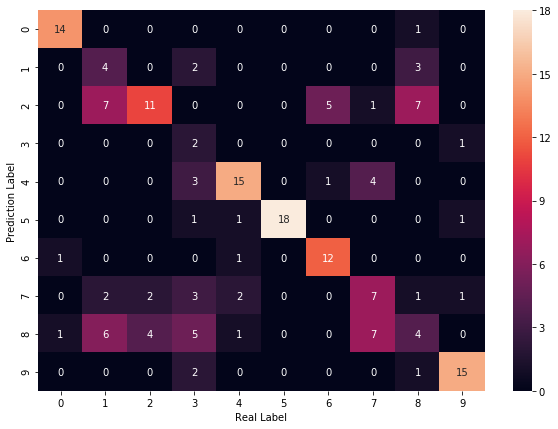

In [13]:
import seaborn as sn


df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.xlabel('Real Label')
plt.ylabel('Prediction Label')
plt.show()

In [14]:
list_P = []
for i,p_value in enumerate(pred_value):
    print("#{} min_error:{} index:{} real:{}".format(i, error_list[i], p_value[0], digits.target[1617+i]))

#0 min_error:1 index:[5] real:5
#1 min_error:2 index:[7] real:2
#2 min_error:2 index:[1 2 8] real:8
#3 min_error:0 index:[0] real:0
#4 min_error:2 index:[1 2 7 8] real:1
#5 min_error:0 index:[8] real:7
#6 min_error:0 index:[6] real:6
#7 min_error:3 index:[1 3 7 9] real:3
#8 min_error:0 index:[2] real:2
#9 min_error:2 index:[1 7 8] real:1
#10 min_error:1 index:[8] real:7
#11 min_error:1 index:[7 8] real:4
#12 min_error:2 index:[4] real:6
#13 min_error:2 index:[3] real:3
#14 min_error:2 index:[1 2 7 8] real:1
#15 min_error:4 index:[1 2 3 4 7 9] real:3
#16 min_error:1 index:[9] real:9
#17 min_error:2 index:[1 2 7 8] real:1
#18 min_error:0 index:[8] real:7
#19 min_error:0 index:[6] real:6
#20 min_error:1 index:[8] real:8
#21 min_error:2 index:[4] real:4
#22 min_error:2 index:[1 9] real:3
#23 min_error:1 index:[7 8] real:1
#24 min_error:1 index:[5] real:4
#25 min_error:0 index:[0] real:0
#26 min_error:1 index:[5] real:5
#27 min_error:2 index:[3] real:3
#28 min_error:2 index:[2] real:6
#29 m

In [15]:
pred_value = []
error_list = []

for j in range(1617):
    pred = []
    for i in range(10):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(10 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )

list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
print("Testset acc:{}".format(np.sum(list_P == digits.target[:1617])/1617))
winner_fitness = []
for winner in winner_list:
    #print(winner.fitness)
    winner_fitness.append(winner.fitness)
print("Avg Base Learner:{}".format(np.mean(winner_fitness)))

Testset acc:0.7043908472479901
Avg Base Learner:0.8658008658008658


In [20]:
from random import randint

list_acc = []

for iii in range(11):
    pred_value = []
    error_list = []


    for j in range(1617,1617+180):
        pred = []
        for i in range(iii):
            [pred_outputs, real_outputs] = get_pred_real(i, j)
            #print(pred_outputs, real_outputs)
            pred.append(pred_outputs)
        #print(np.array(pred).T)

        error = []
        for i in range(10):
            error.append(iii - np.sum(number_codes[i][:iii] == np.array(pred).T))
        #print(error)

        pred_value.append(np.where(error==np.min(error)))
        error_list.append(np.min(error))
        #print(np.where(error==np.min(error)) )
    list_P = []
    for i in pred_value:
        if (len(i[0])) == 1:
            list_P.append(i[0][0])
        else:
            random_pick = randint(0, len(i[0])-1)
            list_P.append(i[0][random_pick])
    acc = np.sum(list_P == digits.target[1617:])/180
    print("Accuracy on training set: {}".format(acc))
    list_acc.append(acc)

Accuracy on training set: 0.09444444444444444
Accuracy on training set: 0.15
Accuracy on training set: 0.2777777777777778
Accuracy on training set: 0.4166666666666667
Accuracy on training set: 0.45555555555555555
Accuracy on training set: 0.45555555555555555
Accuracy on training set: 0.5166666666666667
Accuracy on training set: 0.5444444444444444
Accuracy on training set: 0.5944444444444444
Accuracy on training set: 0.5888888888888889
Accuracy on training set: 0.5944444444444444


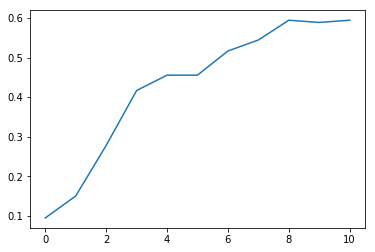

In [23]:
plt.plot(range(11),list_acc)
plt.show()

In [22]:
list_acc

[0.09444444444444444,
 0.15,
 0.2777777777777778,
 0.4166666666666667,
 0.45555555555555555,
 0.45555555555555555,
 0.5166666666666667,
 0.5444444444444444,
 0.5944444444444444,
 0.5888888888888889,
 0.5944444444444444]